In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster  import SpectralClustering
from sklearn          import metrics
from sklearn.datasets import make_moons

np.random.seed(sum(map(ord, 'genomica')))

import matplotlib as mpl
from matplotlib import pyplot as plt


plt.style.use('fivethirtyeight')


# Spectral Clustering: 3 ejemplos

Vamos a ver tres ejemplos de agrupamiento espectral.

## Ejemplo 1. 

Formamos una gráfica con 9 nodos. De ahí vamos a obtener su matriz de adyacencia y la de grado. Con eso vamos a formar el Laplaciano.

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9])
G.add_edges_from([(1,2), (1,3), (1,4),
                  (2,3),
                  (3,4), 
                  (4,5), (4,6),
                  (5,6), (5,7), (5,8),
                  (6,7), (6,8),
                  (7,8), (7,9)])
A = nx.adjacency_matrix(G).toarray()
D = nx.degree(G)

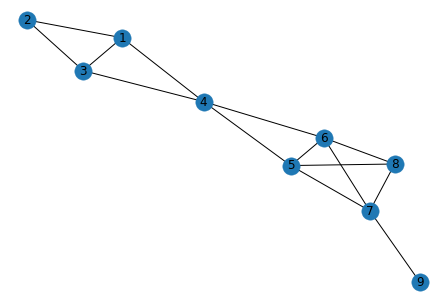

In [ ]:
nx.draw(G,  with_labels=True)

In [ ]:
D = [G.degree(n) for n in G.nodes()]
np.diag(D)

array([[3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

Formamos el Laplaciano (no normalizado)

$L = D - A$

In [ ]:
L = np.diag(D) - A
L

array([[ 3, -1, -1, -1,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0],
       [-1, -1,  3, -1,  0,  0,  0,  0,  0],
       [-1,  0, -1,  4, -1, -1,  0,  0,  0],
       [ 0,  0,  0, -1,  4, -1, -1, -1,  0],
       [ 0,  0,  0, -1, -1,  4, -1, -1,  0],
       [ 0,  0,  0,  0, -1, -1,  4, -1, -1],
       [ 0,  0,  0,  0, -1, -1, -1,  3,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  1]])

Obtenemos los eigenvalores de la matriz L. 

In [ ]:
S, V = np.linalg.eig(L)
np.round(S, decimals=2)

array([0.  , 0.41, 1.1 , 5.88, 2.77, 4.83, 4.  , 4.  , 5.  ])

Ahora encontramos la cantidad de grupos en L usando el segundo eigenvector más pequeño.

In [ ]:
fiedler_pos = np.where(S.real == np.sort(S.real)[1]) [0][0]
fiedler_vector = np.transpose(V)[fiedler_pos]
fiedler_pos

1

In [ ]:
np.sign(fiedler_vector)

array([-1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

Aquí podemos ver que un grupo lo forman los nodos 

$$1,2,3,4$$ 

que tienen un valor negativo mientras que los nodos 

$$5, 6, 7, 8, 9$$ forman otro.

Vamos a usar esa información en un vector para colorear los nodos en la gráfica.

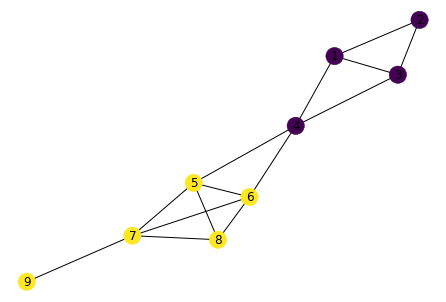

In [ ]:
color_grupo_1 = 7
color_grupo_2 = 9
colores  = [color_grupo_1]*4
colores += [color_grupo_2]*5

nx.draw(G, node_color=colores, with_labels=True)
plt.show()

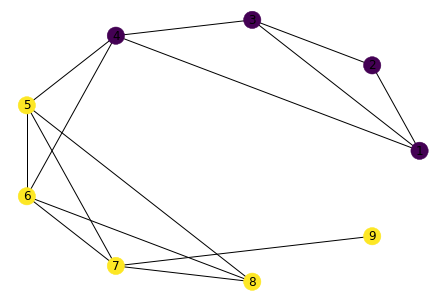

In [ ]:
nx.draw_circular(G, node_color=colores, with_labels=True)

## Ejemplo 2: Medias lunas

También podemos hacer el cluster con puntos disconexos a partir del cual se forme una gráfica bajo algún criterio como los antes mencionados.

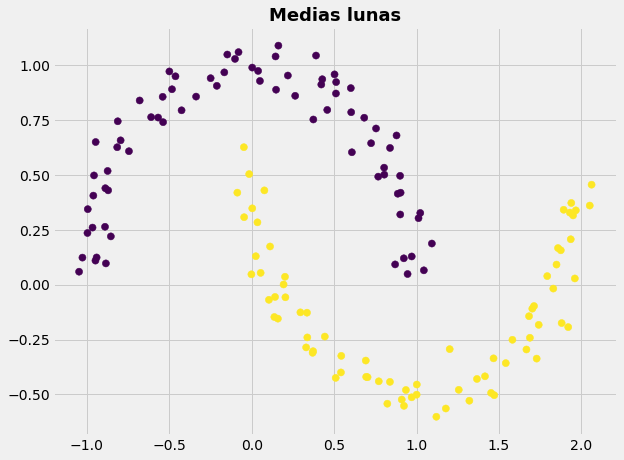

In [ ]:
X_mn, y_mn = make_moons(150, noise=.07)
cmap = 'viridis'
dot_size=50
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Medias lunas', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],
           c=y_mn,
           s=dot_size, cmap=cmap)

Hacemos la clasificación con el método de `sklearn.cluster.SpectralClustering`. Aquí dejo la llamada al método:

>  ```Init signature:
SpectralClustering(
    `n_clusters=8,`
    *,
    eigen_solver=None,
    n_components=None,
    random_state=None,
    n_init=10,
    gamma=1.0,
    affinity='rbf',
    n_neighbors=10,
    eigen_tol=0.0,
    assign_labels='kmeans',
    degree=3,
    coef0=1,
    kernel_params=None,
    n_jobs=None,
)```

De donde podemos ajustar el parámetro `affinity` de la siguiente manera

> ```affinity : string or callable, default 'rbf'
    How to construct the affinity matrix.
     - 'nearest_neighbors' : construct the affinity matrix by computing a
       graph of nearest neighbors.
     - 'rbf' : construct the affinity matrix using a radial basis function
       (RBF) kernel.
     - 'precomputed' : interpret ``X`` as a precomputed affinity matrix.
     - 'precomputed_nearest_neighbors' : interpret ``X`` as a sparse graph
       of precomputed nearest neighbors, and constructs the affinity matrix
       by selecting the ``n_neighbors`` nearest neighbors.
     - one of the kernels supported by
       :func:`~sklearn.metrics.pairwise_kernels`.```

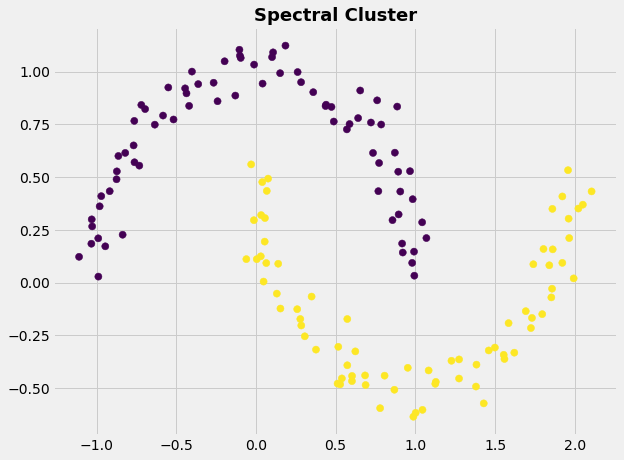

In [ ]:
clf   = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
etiqs = clf.fit_predict(X_mn)


#Ahora hacemos el scatter del resultado
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral Cluster', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=etiqs, s=dot_size, cmap=cmap)

## Ejemplo 3: Zachary Karate Club

> A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

In [ ]:
G = nx.karate_club_graph()

In [ ]:
gt_dict = nx.get_node_attributes(G, 'club')
gt = [gt_dict[i] for i in G.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])
gt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

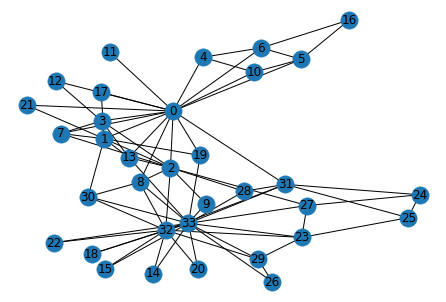

In [ ]:
nx.draw(G, with_labels=True)

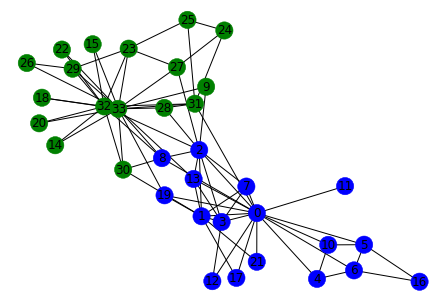

In [ ]:
color_map = []
for i,node in enumerate(G):
    if gt[i]==0:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True, cmap=cmap)
plt.show()

In [ ]:
adj_mat = nx.to_numpy_matrix(G)
sc = SpectralClustering(2, affinity='nearest_neighbors', n_init=100)
sc.fit(adj_mat)


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='nearest_neighbors', n_clusters=2, n_init=100)

In [ ]:
for e,t in zip(sc.labels_, gt):
    se = -1 if e==0 else 1
    st = -1 if t==0 else 1
    if(se*st >0):
        print("predic {} - {} orig ".format(e,t))
    if(se*st < 0):
        print("predic {} - {} orig **".format(e,t))

predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 1 - 0 orig **
predic 1 - 1 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 0 - 0 orig 
predic 0 - 0 orig 
predic 1 - 1 orig 
predic 0 - 0 orig 
predic 1 - 1 orig 
predic 0 - 0 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 
predic 1 - 1 orig 


In [ ]:
etiqs = [6 if x==0 else 8 for x in sc.labels_]
print(etiqs)

[6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 6, 8, 8, 6, 6, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


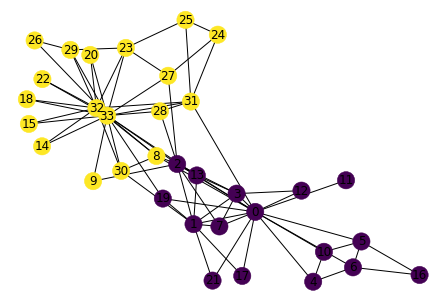

In [ ]:
nx.draw(G, node_color=etiqs, with_labels=True, cmap=cmap)
plt.show()

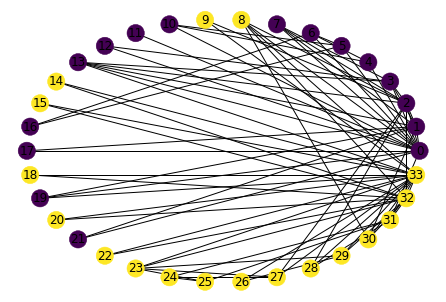

In [ ]:
nx.draw_circular(G, with_labels=True, node_color=etiqs)

In [ ]:
L = nx.laplacian_matrix(G).toarray()
S, V = np.linalg.eig(L)
np.round(S)
fiedler_pos = np.where(S.real == np.sort(S.real)[1]) [0][0]
fiedler_vector = np.transpose(V)[fiedler_pos]

In [ ]:
fiedler_vector.reshape(1,-1).T

array([[-0.11213743],
       [-0.04128789],
       [ 0.02321896],
       [-0.05549978],
       [-0.28460453],
       [-0.32372722],
       [-0.32372722],
       [-0.052586  ],
       [ 0.05160128],
       [ 0.09280089],
       [-0.28460453],
       [-0.21099295],
       [-0.1094613 ],
       [-0.01474197],
       [ 0.16275078],
       [ 0.16275078],
       [-0.42276533],
       [-0.10018142],
       [ 0.16275078],
       [-0.01363713],
       [ 0.16275078],
       [-0.10018142],
       [ 0.16275078],
       [ 0.15569457],
       [ 0.15302558],
       [ 0.16096292],
       [ 0.18710956],
       [ 0.12766405],
       [ 0.0951523 ],
       [ 0.16765031],
       [ 0.07349964],
       [ 0.09875343],
       [ 0.13034546],
       [ 0.11890326]])

In [ ]:
grupos = np.sign(fiedler_vector)

In [ ]:
sgn = lambda x: np.sign(x)
colores = [0]
actual = 0
sgn_ant = sgn(grupos[0])
for n in grupos[1:]:
    if(sgn(n)==sgn_ant):
        colores.append(colores[-1])
    else:
        actual += 1
        colores.append(actual)
for k,col in enumerate(colores):
    print("{} : {}".format(k,col))

0 : 0
1 : 0
2 : 1
3 : 1
4 : 1
5 : 1
6 : 1
7 : 1
8 : 2
9 : 3
10 : 3
11 : 3
12 : 3
13 : 3
14 : 4
15 : 5
16 : 5
17 : 5
18 : 6
19 : 6
20 : 7
21 : 7
22 : 8
23 : 9
24 : 10
25 : 11
26 : 12
27 : 13
28 : 14
29 : 15
30 : 16
31 : 17
32 : 18
33 : 19


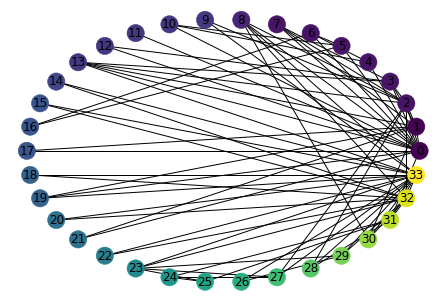

In [ ]:
nx.draw_circular(G, node_color=colores, with_labels=True, cmap=cmap)
plt.show()

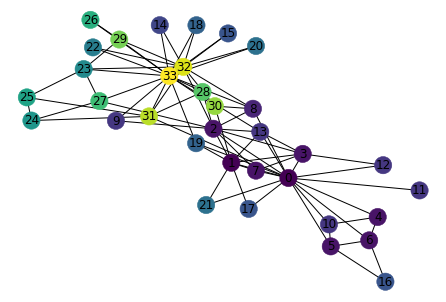

In [ ]:
nx.draw(G, node_color=colores, with_labels=True)
plt.show()